In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import accuracy_score, precision_score, recall_score
import seaborn as sns

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\90535\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_csv('Reviews.csv')

In [3]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [4]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [5]:
df[df["HelpfulnessDenominator"] > 15].describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,11471.000000,11471.000000,11471.000000,11471.000000,1.147100e+04
mean,287120.518525,29.154215,35.411647,3.451748,1.248235e+09
std,160896.029605,43.766227,44.494979,1.739410,5.745141e+07
min,33.000000,0.000000,16.000000,1.000000,9.482400e+08
25%,153149.000000,15.000000,18.000000,1.000000,1.208909e+09
50%,288294.000000,19.000000,23.000000,4.000000,1.256083e+09
75%,425973.500000,30.000000,35.000000,5.000000,1.293149e+09
max,568276.000000,866.000000,923.000000,5.000000,1.350605e+09


Since the comments with more than 15 helpfulness numbers will be examined in the continuation of the study, this has been considered.

In [6]:
len(df.ProductId.unique())

74258

In [7]:
len(df.UserId.unique())

256059

There are 74258 distinct products and 256059 distinct users in this dataframe

In [8]:
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

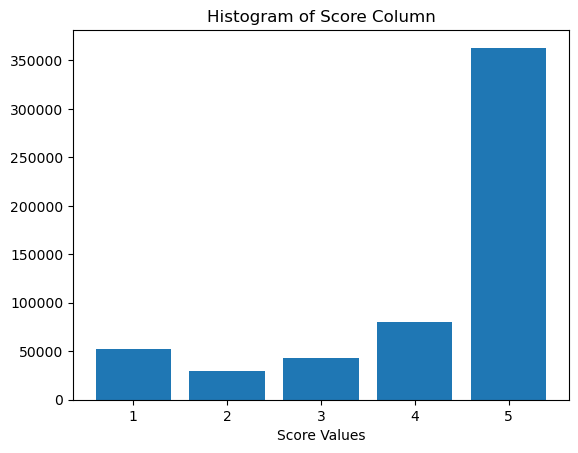

In [9]:
plt.bar(*np.unique(df["Score"], return_counts=True))
plt.title('Histogram of Score Column')
plt.xlabel('Score Values')
plt.show()

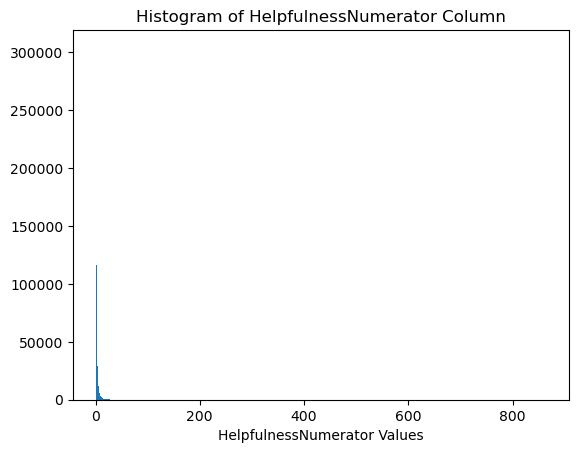

In [10]:
plt.hist(df["HelpfulnessNumerator"],bins=np.arange(min(df["HelpfulnessNumerator"]), max(df["HelpfulnessNumerator"])))
plt.title('Histogram of HelpfulnessNumerator Column')
plt.xlabel('HelpfulnessNumerator Values')
plt.show()

Most of this data is between values between 0-200. It is shown in the boxplot chart below.

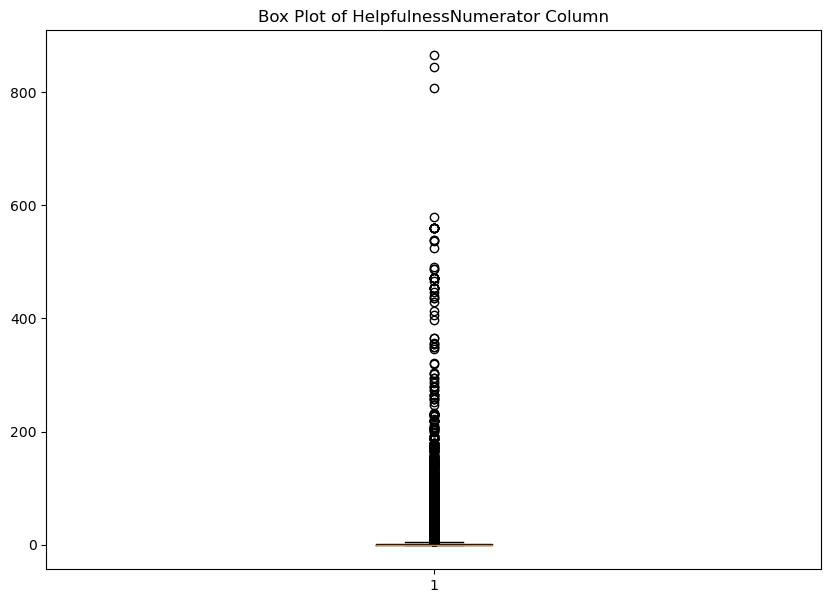

In [11]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df["HelpfulnessNumerator"])
plt.title('Box Plot of HelpfulnessNumerator Column')
plt.show()

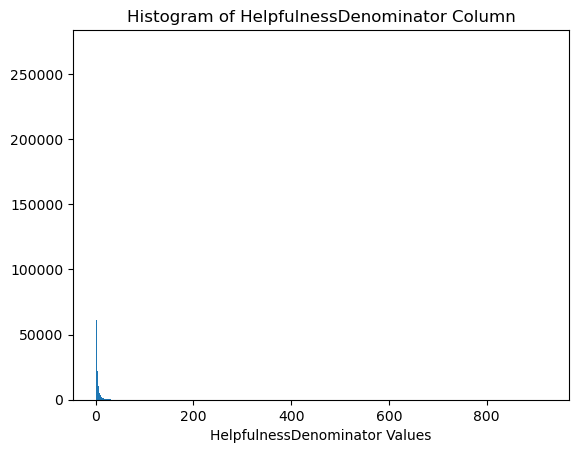

In [12]:
plt.hist(df["HelpfulnessDenominator"],bins=np.arange(min(df["HelpfulnessDenominator"]), max(df["HelpfulnessDenominator"])))
plt.title('Histogram of HelpfulnessDenominator Column')
plt.xlabel('HelpfulnessDenominator Values')
plt.show()

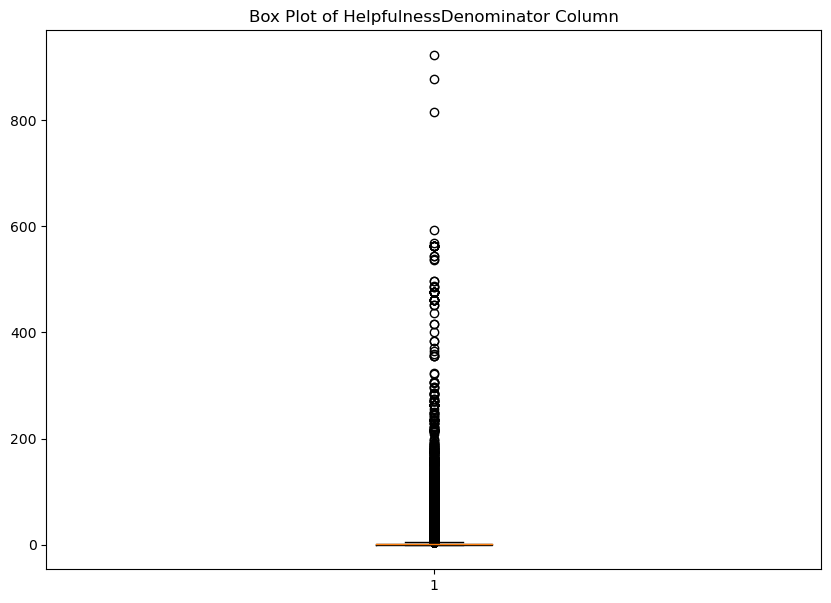

In [13]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df["HelpfulnessDenominator"])
plt.title('Box Plot of HelpfulnessDenominator Column')
plt.show()

In [14]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

Since the features with null values are unimportant and will not be used, there is no need for missing value imputation.

In [15]:
df["ProductId"].value_counts().head(30)

B007JFMH8M    913
B0026RQTGE    632
B002QWHJOU    632
B002QWP89S    632
B002QWP8H0    632
B003B3OOPA    623
B001EO5Q64    567
B000VK8AVK    564
B0026KNQSA    564
B007M83302    564
B001RVFEP2    564
B001RVFERK    564
B007M832YY    564
B0026KPDG8    564
B006HYLW32    564
B0013NUGDE    564
B000KV7ZGQ    556
B000KV61FC    556
B0013A0QXC    542
B005K4Q37A    542
B005K4Q4LK    542
B005K4Q34S    542
B005K4Q1YA    542
B000NMJWZO    542
B000UBD88A    542
B0090X8IPM    530
B003GTR8IO    530
B007Y59HVM    506
B005ZBZLT4    506
B006MONQMC    491
Name: ProductId, dtype: int64

In [16]:
v_c = ["B007JFMH8M","B0026RQTGE","B003B3OOPA","B001EO5Q64","B000VK8AVK","B000KV7ZGQ","B0013A0QXC","B0090X8IPM","B007Y59HVM","B006MONQMC"]

In [17]:
v_c

['B007JFMH8M',
 'B0026RQTGE',
 'B003B3OOPA',
 'B001EO5Q64',
 'B000VK8AVK',
 'B000KV7ZGQ',
 'B0013A0QXC',
 'B0090X8IPM',
 'B007Y59HVM',
 'B006MONQMC']

In [18]:
df = df[df["ProductId"].isin(v_c)]

The 10 products with the most comments were selected for analysis and model setup, and the dataframe was created with them.

In [19]:
stopwords_english = stopwords.words('english') 

Since the VADER sentiment analysis lexicon will be used, no stemming, lemmatization or tokenization process was required on the texts. It was only checked whether the continuous word was stopwords, which are the words that were used.

In [20]:
counts = dict()
for text in df["Text"]:
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    words = text.split()

    for word in words:
        if word in stopwords_english:
            continue
        else:
            if word in counts:
                counts[word] += 1
            else:
                counts[word] = 1
    

In [21]:
len(counts)

17358

In [22]:
words = []
for (key, value) in counts.items():
    if value > 100:
        words.append(key)
        

More than 100 times past words have been selected

In [23]:
sid = SentimentIntensityAnalyzer()

In [24]:
df["Sentiment_scores"] = df["Text"].apply(lambda x: sid.polarity_scores(x))

C:\Users\90535\AppData\Local\Temp\ipykernel_2296\408658345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sentiment_scores"] = df["Text"].apply(lambda x: sid.polarity_scores(x))


In [25]:
df["Text"] = df["Text"].apply(lambda x: x.lower().translate(str.maketrans('', '', string.punctuation)))

C:\Users\90535\AppData\Local\Temp\ipykernel_2296\3743758957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Text"] = df["Text"].apply(lambda x: x.lower().translate(str.maketrans('', '', string.punctuation)))


After the sentiment analysis, things like punctuation in the comments were removed and all words were converted to lowercase. Since the Sentiment analysis lexicon may be affected by punctuation, the punctuation marks were removed after the analysis was performed.

In [26]:
important_words = []
for wrd in words:
    contains_words_df = df[df["Text"].str.contains(wrd)]
    not_contains_word_df = df[~df["Text"].str.contains(wrd)]
    contains_words_df["contains_neu_scores"] = contains_words_df["Sentiment_scores"].apply(lambda x: x["neu"])
    not_contains_word_df["contains_neu_scores"] = not_contains_word_df["Sentiment_scores"].apply(lambda x: x["neu"])
    test_stat1,p_value_1 = shapiro(contains_words_df.loc[:,"contains_neu_scores"])
    test_stat2,p_value_2 = shapiro(not_contains_word_df.loc[:,"contains_neu_scores"])
    if p_value_1 < 0.05 or p_value_2 < 0.05:
        res = mannwhitneyu(contains_words_df.loc[:,"contains_neu_scores"],not_contains_word_df.loc[:,"contains_neu_scores"])
        if res[1] < 0.05:
            important_words.append(wrd)
        else:
            continue
    else:
        test_stat3,p_value_3 = levene(contains_words_df.loc[:,"contains_neu_scores"],not_contains_word_df.loc[:,"contains_neu_scores"])
        if p_value_3 < 0.05:
            test_stat4, p_value_4 = ttest_ind(contains_words_df.loc[:,"contains_neu_scores"],not_contains_word_df.loc[:,"contains_neu_scores"],equal_var=False)
            if p_value_4 < 0.05:
                important_words.append(wrd)
            else:
                continue
        else:
            test_stat5, p_value_5 = ttest_ind(contains_words_df.loc[:,"contains_neu_scores"],not_contains_word_df.loc[:,"contains_neu_scores"],equal_var=True)
            if p_value_5 < 0.05:
                important_words.append(wrd)
            else:
                continue
            
                
            
        
    
    

C:\Users\90535\AppData\Local\Temp\ipykernel_2296\497619284.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contains_words_df["contains_neu_scores"] = contains_words_df["Sentiment_scores"].apply(lambda x: x["neu"])
C:\Users\90535\AppData\Local\Temp\ipykernel_2296\497619284.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_contains_word_df["contains_neu_scores"] = not_contains_word_df["Sentiment_scores"].apply(lambda x: x["neu"])
C:\Users\90535\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1

The words that are important are selected from the list of words created beforehand. First of all, the sentiment neutral scores of the comments in which these words were used, and then the sentiment neutral scores of the comments that did not occur were taken as an array. These values were first put into the Normal distribution test (shapiro) and according to the results of this test, they were put into the t-test or Mann-Whitney test. Also, before the t-test was performed, the variance test was performed (levene). If there is a difference in terms of neutral scores, that word was considered important because it affected the neutrality of the comment.

In [27]:
len(important_words)

419

In [28]:
df_new = df.loc[:,["Text"]]

In [29]:
for wrd in important_words:
    df_new[wrd] = df["Text"].apply(lambda x: 1 if wrd in x else 0)

C:\Users\90535\AppData\Local\Temp\ipykernel_2296\4236069820.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[wrd] = df["Text"].apply(lambda x: 1 if wrd in x else 0)
C:\Users\90535\AppData\Local\Temp\ipykernel_2296\4236069820.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[wrd] = df["Text"].apply(lambda x: 1 if wrd in x else 0)
C:\Users\90535\AppData\Local\Temp\ipykernel_2296\4236069820.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

In [30]:
df_new.head()

,Text,12,year,old,three,years,night,one,dog,never,...,raisin,moist,play,jug,kibble,popchips,squeeze,mio,quaker,influenster
74631,my 12 year old sheltie has chronic brochotitis...,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
74632,these are genuine greenies product not a knock...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
74633,our dogs love greenies but of course which dog...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
74634,what can i say dogs love greenies they begg fo...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
74635,this review is for a box of greenies lite for ...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


A new dataframe is created according to whether that word is found or not in that comment.

In [31]:
df_new["Score"] = df.loc[df_new.index]["Score"]

C:\Users\90535\AppData\Local\Temp\ipykernel_2296\1143880638.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new["Score"] = df.loc[df_new.index]["Score"]


In [32]:
df_new

,Text,12,year,old,three,years,night,one,dog,never,...,moist,play,jug,kibble,popchips,squeeze,mio,quaker,influenster,Score
74631,my 12 year old sheltie has chronic brochotitis...,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,5
74632,these are genuine greenies product not a knock...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,5
74633,our dogs love greenies but of course which dog...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,5
74634,what can i say dogs love greenies they begg fo...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,5
74635,this review is for a box of greenies lite for ...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563878,i loved these cookies and so did my kids you c...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
563879,this is a great tasting cookie it is very soft...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
563880,these are great for a quick snack they are sat...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
563881,i love the quaker soft baked cookies the real...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5


In [33]:
df_new["Score"].value_counts()

5    3632
4    1131
3     580
2     294
1     287
Name: Score, dtype: int64

In [34]:
df_new["Score_Class"] = df_new["Score"].apply(lambda x: 1 if x>3 else 0)

C:\Users\90535\AppData\Local\Temp\ipykernel_2296\1667042880.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new["Score_Class"] = df_new["Score"].apply(lambda x: 1 if x>3 else 0)


In [35]:
df_new["Score_Class"].value_counts()

1    4763
0    1161
Name: Score_Class, dtype: int64

Since there are a lot of 5 ratings and in order to make this problem a classification problem, the comments with 4-5 ratings were appreciated (1), the comments with 1-2-3 ratings were evaluated as not liked (0).

In [36]:
df_new.drop(['Score'], axis=1,inplace = True)

In [37]:
df_new

,Text,12,year,old,three,years,night,one,dog,never,...,moist,play,jug,kibble,popchips,squeeze,mio,quaker,influenster,Score_Class
74631,my 12 year old sheltie has chronic brochotitis...,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
74632,these are genuine greenies product not a knock...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
74633,our dogs love greenies but of course which dog...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
74634,what can i say dogs love greenies they begg fo...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
74635,this review is for a box of greenies lite for ...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563878,i loved these cookies and so did my kids you c...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
563879,this is a great tasting cookie it is very soft...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
563880,these are great for a quick snack they are sat...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
563881,i love the quaker soft baked cookies the real...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [38]:
df_new.dtypes

Text           object
12              int64
year            int64
old             int64
three           int64
                ...  
squeeze         int64
mio             int64
quaker          int64
influenster     int64
Score_Class     int64
Length: 421, dtype: object

In [39]:
for col in df_new.columns:
    df_new[col] = df_new[col].astype("object")

In [40]:
df_new.dtypes

Text           object
12             object
year           object
old            object
three          object
                ...  
squeeze        object
mio            object
quaker         object
influenster    object
Score_Class    object
Length: 421, dtype: object

In [41]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [42]:
binary_cols = [col for col in df_new.columns if df_new[col].dtype not in [int, float]
               and df_new[col].nunique() == 2]

In [43]:
for col in binary_cols:
    label_encoder(df_new, col)

In [44]:
X = df_new.drop(['Text','Score_Class'], axis=1)
y = df_new[["Score_Class"]]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [46]:
log_model = LogisticRegression()

In [47]:
log_model_1 = LogisticRegression().fit(X_train, y_train)

C:\Users\90535\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.60      0.49      0.54       237
           1       0.88      0.92      0.90       948

    accuracy                           0.83      1185
   macro avg       0.74      0.71      0.72      1185
weighted avg       0.82      0.83      0.83      1185



C:\Users\90535\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


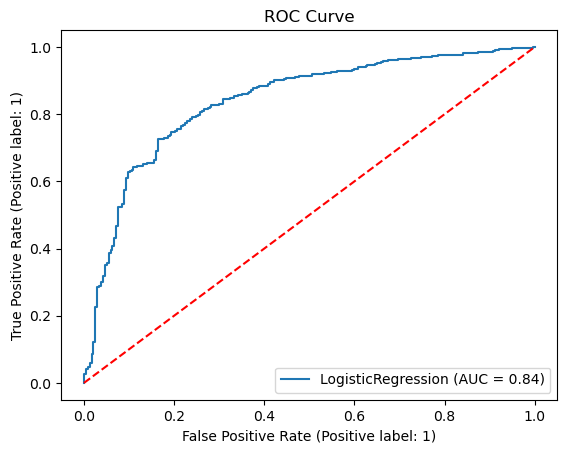

In [48]:
y_pred_1 = log_model_1.predict(X_test)
y_prob_1 = log_model_1.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred_1))
plot_roc_curve(log_model_1, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

In [49]:
cv_results = cross_validate(log_model_1,
                            X_train, y_train,
                            cv=10,
                            scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

C:\Users\90535\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\90535\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\90535\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\90535\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [50]:
print(cv_results['test_accuracy'].mean())
print(cv_results['test_precision'].mean())
print(cv_results['test_recall'].mean())
print(cv_results['test_f1'].mean())
print(cv_results['test_roc_auc'].mean())

0.8427935522430664
0.8809928615460623
0.9305423863901829
0.9050118802221204
0.8459040332572154


In [51]:
log_model_1.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [52]:
log_model_params = {"penalty": ["l1", "l2", "elasticnet"],
               "solver" :["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]}

In [53]:
log_model_grid = GridSearchCV(log_model,
                              log_model_params,
                              cv=10,scoring= "f1",
                              n_jobs=-1,
                              verbose=1).fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


C:\Users\90535\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
110 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\90535\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\90535\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\90535\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Va

In [54]:
log_model_grid.best_params_

{'penalty': 'l2', 'solver': 'saga'}

In [55]:
log_model_2 = LogisticRegression(**log_model_grid.best_params_, random_state=1).fit(X_train, y_train)

C:\Users\90535\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\90535\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [56]:
cv_results_2 = cross_validate(log_model_2,
                            X_train, y_train,
                            cv=10,
                            scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

C:\Users\90535\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\90535\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\90535\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\90535\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\90535\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector

In [57]:
print(cv_results_2['test_accuracy'].mean())
print(cv_results_2['test_precision'].mean())
print(cv_results_2['test_recall'].mean())
print(cv_results_2['test_f1'].mean())
print(cv_results_2['test_roc_auc'].mean())

0.8430045227072014
0.8810218728172498
0.9308041664948951
0.9051512926749996
0.8460791572985631


C:\Users\90535\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.60      0.49      0.54       237
           1       0.88      0.92      0.90       948

    accuracy                           0.83      1185
   macro avg       0.74      0.71      0.72      1185
weighted avg       0.82      0.83      0.83      1185



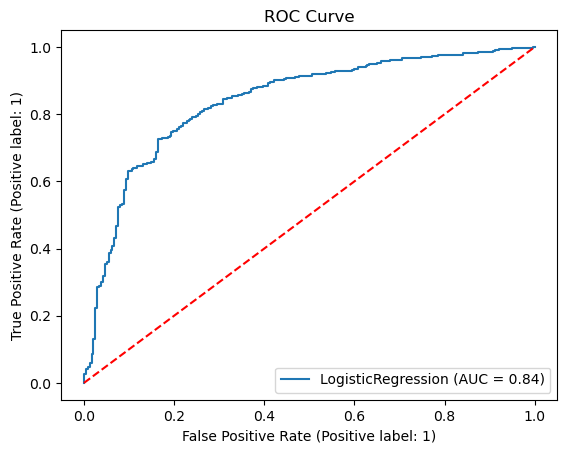

In [58]:
y_pred_2 = log_model_2.predict(X_test)
y_prob_2 = log_model_2.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred_2))
plot_roc_curve(log_model_2, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

In [59]:
cart_model = DecisionTreeClassifier(random_state=1)

In [60]:
cart_model_1 = DecisionTreeClassifier(random_state=1).fit(X_train,y_train)

In [61]:
cv_results_3 = cross_validate(cart_model_1,
                            X_train, y_train,
                            cv=10,
                            scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

In [62]:
print(cv_results_3['test_accuracy'].mean())
print(cv_results_3['test_precision'].mean())
print(cv_results_3['test_recall'].mean())
print(cv_results_3['test_f1'].mean())
print(cv_results_3['test_roc_auc'].mean())

0.7583848493769011
0.8538108820708027
0.8445575847521678
0.8490054766657611
0.6236345661021241


In [63]:
y_pred_3 = cart_model_1 .predict(X_test)
y_prob_3 = cart_model_1 .predict_proba(X_test)[:, 1]

              precision    recall  f1-score   support

           0       0.37      0.40      0.38       237
           1       0.85      0.83      0.84       948

    accuracy                           0.74      1185
   macro avg       0.61      0.61      0.61      1185
weighted avg       0.75      0.74      0.75      1185



C:\Users\90535\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


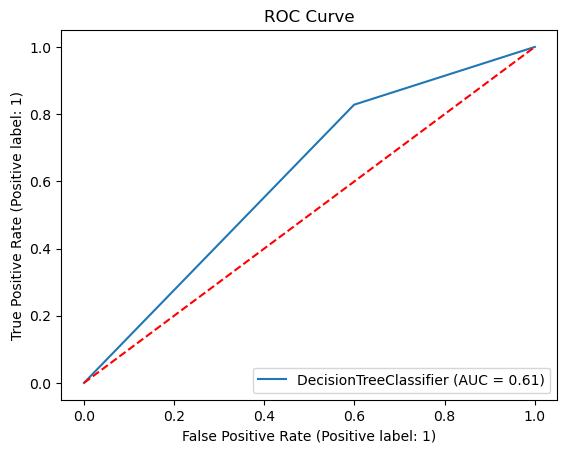

In [64]:
print(classification_report(y_test, y_pred_3))
plot_roc_curve(cart_model_1, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

In [65]:
cart_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20),
               "criterion" : ["gini", "entropy", "log_loss"],
               "splitter" : ["best", "random"]}
               
               

In [98]:
cart_best_grid = GridSearchCV(cart_model,
                              cart_params,
                              cv=10,scoring= "f1",
                              n_jobs=-1,
                              verbose=1).fit(X_train, y_train)

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits


C:\Users\90535\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3600 fits failed out of a total of 10800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\90535\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\90535\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\90535\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_fa

In [99]:
cart_best_grid.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [100]:
cart_model_2 = DecisionTreeClassifier(**cart_best_grid.best_params_, random_state=1).fit(X_train, y_train)

In [101]:
cv_results_4 = cross_validate(cart_model_2,
                            X_train, y_train,
                            cv=10,
                            scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

In [102]:
print(cv_results_4['test_accuracy'].mean())
print(cv_results_4['test_precision'].mean())
print(cv_results_4['test_recall'].mean())
print(cv_results_4['test_f1'].mean())
print(cv_results_4['test_roc_auc'].mean())

0.8050222567149268
0.8050222567149268
1.0
0.8919800765895127
0.5668811572694092


In [103]:
y_pred_4 = cart_model_2 .predict(X_test)
y_prob_4 = cart_model_2 .predict_proba(X_test)[:, 1]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       237
           1       0.80      1.00      0.89       948

    accuracy                           0.80      1185
   macro avg       0.40      0.50      0.44      1185
weighted avg       0.64      0.80      0.71      1185



C:\Users\90535\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\90535\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\90535\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\90535\anaconda3\lib\site-packages\sklearn\util

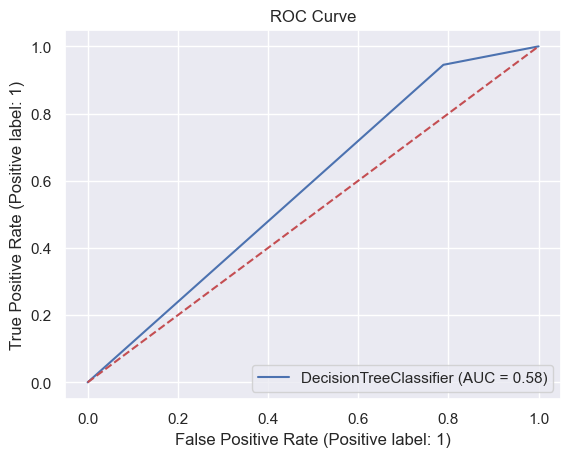

In [104]:
print(classification_report(y_test, y_pred_4))
plot_roc_curve(cart_model_2, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

In [105]:
df_new["ProductId"] = df.loc[df_new.index]["ProductId"]

In [106]:
df_new

,Text,12,year,old,three,years,night,one,dog,never,...,play,jug,kibble,popchips,squeeze,mio,quaker,influenster,Score_Class,ProductId
74631,my 12 year old sheltie has chronic brochotitis...,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,B0026RQTGE
74632,these are genuine greenies product not a knock...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,B0026RQTGE
74633,our dogs love greenies but of course which dog...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,B0026RQTGE
74634,what can i say dogs love greenies they begg fo...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,B0026RQTGE
74635,this review is for a box of greenies lite for ...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,B0026RQTGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563878,i loved these cookies and so did my kids you c...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,B007JFMH8M
563879,this is a great tasting cookie it is very soft...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,B007JFMH8M
563880,these are great for a quick snack they are sat...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,B007JFMH8M
563881,i love the quaker soft baked cookies the real...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,B007JFMH8M


In [107]:
df_products = df_new.groupby("ProductId").mean()

In [108]:
df_products.reset_index(inplace =True)

In [109]:
def cosine_similarity(A, B):
    '''
    Input:
        A: a numpy array which corresponds to a word vector
        B: A numpy array which corresponds to a word vector
    Output:
        cos: numerical number representing the cosine similarity between A and B.
    '''

    ### START CODE HERE ###
    dot = np.dot(A,B)    
    norma = np.linalg.norm(A)
    normb = np.linalg.norm(B)   
    cos = dot / (norma * normb)

    ### END CODE HERE ###
    return cos


In [110]:
df_products.loc[0, df_products.columns != 'ProductId'].to_numpy(dtype= "float")

array([0.04496403, 0.11151079, 0.31115108, 0.02697842, 0.02158273,
       0.01978417, 0.4676259 , 0.72841727, 0.0881295 , 0.05215827,
       0.04316547, 0.43345324, 0.20143885, 0.42446043, 0.09352518,
       0.04136691, 0.05035971, 0.15107914, 0.14388489, 0.36330935,
       0.06654676, 0.49280576, 0.24640288, 0.19244604, 0.08273381,
       0.13669065, 0.04496403, 0.07913669, 0.06654676, 0.04676259,
       0.10791367, 0.02338129, 0.12589928, 0.1852518 , 0.23381295,
       0.19244604, 0.05035971, 0.30215827, 0.03956835, 0.06294964,
       0.03597122, 0.00359712, 0.05215827, 0.0971223 , 0.09352518,
       0.03956835, 0.14388489, 0.00179856, 0.07553957, 0.04136691,
       0.00359712, 0.03597122, 0.0647482 , 0.34532374, 0.16366906,
       0.07194245, 0.03776978, 0.08992806, 0.11510791, 0.13848921,
       0.00179856, 0.01618705, 0.16906475, 0.21582734, 0.27517986,
       0.1528777 , 0.08633094, 0.0971223 , 0.01618705, 0.17805755,
       0.        , 0.0323741 , 0.05755396, 0.6528777 , 0.13309

In [111]:
d = []
for i in range(df_products.shape[0]):
    for j in range(df_products.shape[0]):
        if i == j:
            continue
        else:
            if i > j:
                       d.append({
                                    'Product_Id_1': df_products["ProductId"][i],
                                    'Product_2': df_products["ProductId"][j],
                                    'Similarity_Scores':  cosine_similarity(df_products.loc[i, df_products.columns != 'ProductId'].to_numpy(dtype= "float"), df_products.loc[j, df_products.columns != 'ProductId'].to_numpy(dtype= "float"))
                                                                          }
                                                                            )
            else:
                continue

In [112]:
last_df = pd.DataFrame(d)

In [113]:
last_df

,Product_Id_1,Product_2,Similarity_Scores
0,B000VK8AVK,B000KV7ZGQ,0.643506
1,B0013A0QXC,B000KV7ZGQ,0.686354
2,B0013A0QXC,B000VK8AVK,0.727239
3,B001EO5Q64,B000KV7ZGQ,0.694599
4,B001EO5Q64,B000VK8AVK,0.708028
5,B001EO5Q64,B0013A0QXC,0.759220
6,B0026RQTGE,B000KV7ZGQ,0.835893
7,B0026RQTGE,B000VK8AVK,0.747524
8,B0026RQTGE,B0013A0QXC,0.777654
9,B0026RQTGE,B001EO5Q64,0.756087


In [114]:
last_df.sort_values(by = 'Similarity_Scores',ascending=False).reset_index(drop = True)

,Product_Id_1,Product_2,Similarity_Scores
0,B003B3OOPA,B001EO5Q64,0.985890
1,B007Y59HVM,B0013A0QXC,0.884925
2,B0026RQTGE,B000KV7ZGQ,0.835893
3,B0090X8IPM,B007Y59HVM,0.808666
4,B0026RQTGE,B0013A0QXC,0.777654
5,B007Y59HVM,B001EO5Q64,0.766613
6,B007Y59HVM,B0026RQTGE,0.761207
7,B001EO5Q64,B0013A0QXC,0.759220
8,B003B3OOPA,B0026RQTGE,0.759013
9,B0090X8IPM,B0013A0QXC,0.758004


The most similar products to each other are shown above. These products can be recommended together.

In [115]:
def calculate_metrics(predicted, real):
  # Calculate accuracy
      accuracy = accuracy_score(real, predicted)
  
  # Calculate precision
      precision = precision_score(real, predicted, average = "macro", zero_division = 0)
  
  # Calculate recall
      recall = recall_score(real, predicted,average = "macro",zero_division = 0)
  
  # Return results as a dictionary
      return {'accuracy': accuracy, 'precision': precision, 'recall': recall}

In [116]:
pd.DataFrame({"log_model_1":calculate_metrics(y_pred_1,y_test),
             "log_model_2":calculate_metrics(y_pred_2,y_test),
             "cart_model_1":calculate_metrics(y_pred_3,y_test),
             "cart_model_2":calculate_metrics(y_pred_4,y_test)},index=["accuracy","precision","recall"])

,log_model_1,log_model_2,cart_model_1,cart_model_2
accuracy,0.833755,0.833755,0.742616,0.8
precision,0.741001,0.741001,0.607517,0.4
recall,0.706224,0.706224,0.614451,0.5


In [117]:
!pip install mlxtend

In [118]:
from mlxtend.evaluate import paired_ttest_5x2cv

t_1, p_1 = paired_ttest_5x2cv(estimator1=log_model_1,estimator2=log_model_2,X=X, y=y)
alpha = 0.05


C:\Users\90535\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\90535\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\90535\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\90535\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\90535\anaconda3\li

In [119]:
t_2, p_2 = paired_ttest_5x2cv(estimator1=log_model_1,estimator2=cart_model_1,X=X, y=y)
alpha = 0.05

C:\Users\90535\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\90535\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\90535\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\90535\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [120]:
t_3, p_3 = paired_ttest_5x2cv(estimator1=log_model_1,estimator2=cart_model_2,X=X, y=y)
alpha = 0.05

C:\Users\90535\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\90535\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\90535\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\90535\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [121]:
df_4 = pd.DataFrame({"log_model_2": [p_1, t_1],
        "cart_model_1": [p_2, t_2],
        "cart_model_2": [p_3,t_3]} , index=["p_value", "test_value"])

In [122]:
df_4 

,log_model_2,cart_model_1,cart_model_2
p_value,1.0,0.000031,0.265506
test_value,0.0,14.252893,1.253313


In [123]:
auc_scores = [roc_auc_score(y_test, y_prob_1),roc_auc_score(y_test, y_prob_2),roc_auc_score(y_test, y_prob_3),roc_auc_score(y_test, y_prob_4)]

In [124]:
precision_scores = [precision_score(y_test, y_pred_1, average = "macro", zero_division = 0), precision_score(y_test, y_pred_2, average = "macro", zero_division = 0),precision_score(y_test, y_pred_3, average = "macro", zero_division = 0),precision_score(y_test, y_pred_4, average = "macro", zero_division = 0)]

In [125]:
recall_scores = [recall_score(y_test, y_pred_1,average = "macro",zero_division = 0),recall_score(y_test, y_pred_2,average = "macro",zero_division = 0),recall_score(y_test, y_pred_3,average = "macro",zero_division = 0),recall_score(y_test, y_pred_4,average = "macro",zero_division = 0)]

In [126]:
accuracy_scores = [accuracy_score(y_test, y_pred_1),accuracy_score(y_test, y_pred_2),accuracy_score(y_test, y_pred_3),accuracy_score(y_test, y_pred_4)]

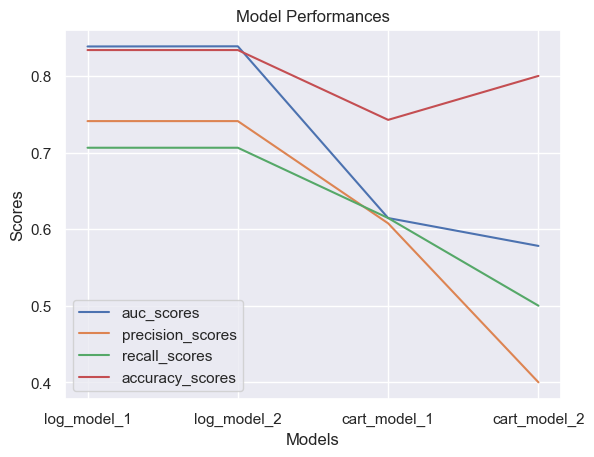

In [127]:
x_axis = ['log_model_1', 'log_model_2', 'cart_model_1', "cart_model_2"]
y_auc = auc_scores
y_precision = precision_scores
y_recall = recall_scores
y_accuracy = accuracy_scores
plt.plot(x_axis, y_auc, label = "auc_scores")
plt.plot(x_axis, y_precision, label = "precision_scores")
plt.plot(x_axis, y_recall, label = "recall_scores")
plt.plot(x_axis, y_accuracy, label = "accuracy_scores")
plt.title('Model Performances')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend()
plt.show()

In [128]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

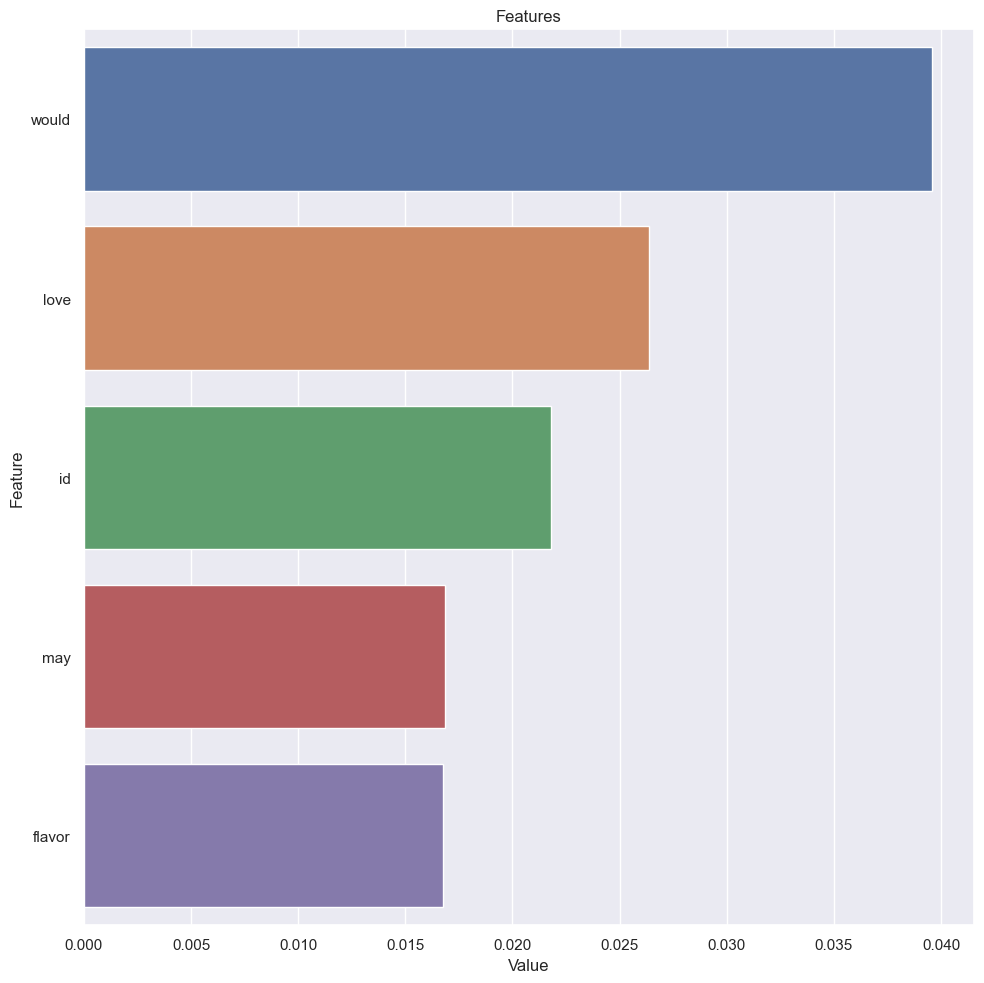

In [132]:
plot_importance(cart_model_1, X, num=5, save=False)